# Homework 6 - Stock and Google Search Correlation Analysis 1
## Group 1
## 14 July 2021

### Introduction

Code imports and performs analysis on daily stock price and interest over time over last 90 days (4/1/2021 to 6/30/2021) for: <br>
* GameStop (GME) <br>
* Apple (AAPL) <br>
* Coke (KO)<br>
* John Deere (DE) <br>
* AMC (AMC) <br>


### Import

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import date
from pytrends.request import TrendReq

%matplotlib inline

### Global Varables

In [2]:
dataDir = r"./Data Files/"  #Directory of all data

today = date.today()  # Todays date

### Global Functions

In [3]:
# Function gets stock data and trend data if needed

def get_data(ticker):
    if os.path.exists(f"{dataDir}{ticker}_{today}.csv"):
        #Get stored data
        stored_data = pd.read_csv(f"{dataDir}{ticker}_{today}.csv")
        
        return stored_data
    else:
        #Get new data

        # Connect to Google API
        pytrends = TrendReq(hl='en-US', tz=360)

        # Set Keyword
        kw_list = [ticker]

        # Build Payload
        pytrends.build_payload(kw_list, timeframe='2021-04-01 2021-06-30', geo='')

        # Get trends Data frame
        trend_data = pytrends.interest_over_time()
        trend_data.rename(columns = {ticker: "Search Interest"},inplace = True)

        # Get Stock Data
        stock_data = yf.download(ticker, start="2021-04-01", end="2021-06-30", interval="1d")

        # Combine Data
        new_data = pd.concat([stock_data, trend_data], axis = 1, join = 'inner')

        # Export to data folder
        new_data.to_csv(f"{dataDir}{ticker}_{today}.csv")

        return new_data
    

### Data and Analysis

#### Gamestop(GME)
Connor Moore

##### Get Data

In [4]:
GME_DF = get_data("GME")

# Name unnamed date column
GME_DF.rename(columns = {"Unnamed: 0": "Date"},inplace = True)

GME_DF

Date        Open        High         Low       Close   Adj Close  \
0   2021-04-01  193.360001  196.970001  183.600006  191.449997  191.449997   
1   2021-04-05  171.000000  195.000000  164.809998  186.949997  186.949997   
2   2021-04-06  185.210007  192.000000  183.559998  184.500000  184.500000   
3   2021-04-07  183.220001  184.500000  176.110001  177.970001  177.970001   
4   2021-04-08  185.880005  185.880005  164.300003  170.259995  170.259995   
..         ...         ...         ...         ...         ...         ...   
57  2021-06-23  221.449997  222.570007  214.119995  219.339996  219.339996   
58  2021-06-24  221.160004  227.449997  211.600006  212.309998  212.309998   
59  2021-06-25  214.000000  214.199997  198.500000  209.509995  209.509995   
60  2021-06-28  211.250000  224.449997  210.199997  213.250000  213.250000   
61  2021-06-29  213.589996  215.220001  208.009995  210.880005  210.880005   

      Volume  Search Interest  isPartial  
0    9334300               72      False  
1   14070500               67      False  
2    6218300               59      False  
3    4768300               52      False  
4   10047400               53      False  
..       ...              ...        ...  
57   3555100               43      False  
58   3863300               36      False  
59  12692700               33      False  
60   4879400               33      False  
61   2480000               32      False  

[62 rows x 9 columns]

In [5]:
# Add difference

GME_DF["Price Difference"] = GME_DF["Open"]-GME_DF["Close"]

In [6]:
# Set date as index
GME_DF.set_index('Date', inplace=True)
#add rename 
GME_DF.index = pd.to_datetime(GME_DF.index)
GME_DF

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  193.360001  196.970001  183.600006  191.449997  191.449997   
2021-04-05  171.000000  195.000000  164.809998  186.949997  186.949997   
2021-04-06  185.210007  192.000000  183.559998  184.500000  184.500000   
2021-04-07  183.220001  184.500000  176.110001  177.970001  177.970001   
2021-04-08  185.880005  185.880005  164.300003  170.259995  170.259995   
...                ...         ...         ...         ...         ...   
2021-06-23  221.449997  222.570007  214.119995  219.339996  219.339996   
2021-06-24  221.160004  227.449997  211.600006  212.309998  212.309998   
2021-06-25  214.000000  214.199997  198.500000  209.509995  209.509995   
2021-06-28  211.250000  224.449997  210.199997  213.250000  213.250000   
2021-06-29  213.589996  215.220001  208.009995  210.880005  210.880005   

              Volume  Search Interest  isPartial  Price Difference  
Date                                                                
2021-04-01   9334300               72      False          1.910004  
2021-04-05  14070500               67      False        -15.949997  
2021-04-06   6218300               59      False          0.710007  
2021-04-07   4768300               52      False          5.250000  
2021-04-08  10047400               53      False         15.620010  
...              ...              ...        ...               ...  
2021-06-23   3555100               43      False          2.110001  
2021-06-24   3863300               36      False          8.850006  
2021-06-25  12692700               33      False          4.490005  
2021-06-28   4879400               33      False         -2.000000  
2021-06-29   2480000               32      False          2.709991  

[62 rows x 9 columns]

##### Matplotlib Plot

Text(0.5, 1.0, 'Price Difference vs. Search Interest - GME')

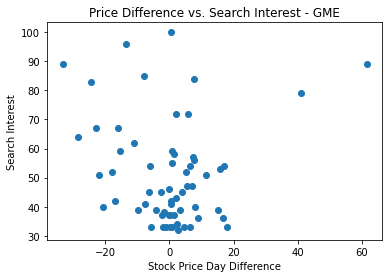

In [7]:
plt.scatter(GME_DF["Price Difference"].values, GME_DF["Search Interest"])
plt.xlabel('Stock Price Day Difference')
plt.ylabel('Search Interest')
plt.title('Price Difference vs. Search Interest - GME')

##### Seaborne plot

Text(0.5, 1.0, 'Price Differnce and Interest Over Time - GME')

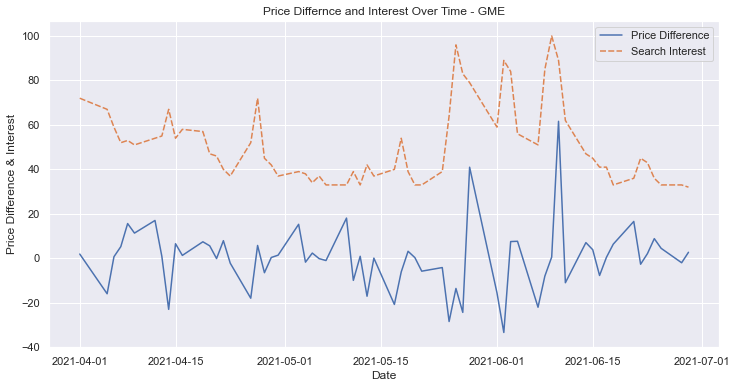

In [8]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(data=GME_DF[["Price Difference","Search Interest"]], ax=ax)
plt.xlabel("Date")
plt.ylabel("Price Difference & Interest")
plt.title("Price Differnce and Interest Over Time - GME")

##### Plotly Plot

In [9]:
fig = px.bar(GME_DF, x=GME_DF.index, y="Price Difference",title="Daily Stock Price Changes - GME")
fig.show()
# add title

#### Apple (AAPL)
Ken Cupples

##### Get Data

In [10]:
#Reads in Apple stock data from a csv file
Apple = pd.read_csv(f"{dataDir}/AAPL.csv")

In [11]:
AppleSecondQuarter = get_data('aapl')
AppleSecondQuarter

Unnamed: 0        Open        High         Low       Close   Adj Close  \
0   2021-04-01  123.660004  124.180000  122.489998  123.000000  122.791428   
1   2021-04-05  123.870003  126.160004  123.070000  125.900002  125.686516   
2   2021-04-06  126.500000  127.129997  125.650002  126.209999  125.995987   
3   2021-04-07  125.830002  127.919998  125.139999  127.900002  127.683121   
4   2021-04-08  128.949997  130.389999  128.520004  130.360001  130.138947   
..         ...         ...         ...         ...         ...         ...   
57  2021-06-23  133.770004  134.320007  133.229996  133.699997  133.699997   
58  2021-06-24  134.449997  134.639999  132.929993  133.410004  133.410004   
59  2021-06-25  133.460007  133.889999  132.809998  133.110001  133.110001   
60  2021-06-28  133.410004  135.250000  133.350006  134.779999  134.779999   
61  2021-06-29  134.800003  136.490005  134.350006  136.330002  136.330002   

      Volume  Search Interest  isPartial  
0   75089100               50      False  
1   88651200               52      False  
2   80171300               50      False  
3   83466700               52      False  
4   88844600               52      False  
..       ...              ...        ...  
57  60214200               35      False  
58  68711000               38      False  
59  70783700               31      False  
60  62111300               30      False  
61  64556100               37      False  

[62 rows x 9 columns]

In [12]:
# Name unnamed date column
AppleSecondQuarter.rename(columns = {"Unnamed: 0": "Date"},inplace = True)
AppleSecondQuarter

Date        Open        High         Low       Close   Adj Close  \
0   2021-04-01  123.660004  124.180000  122.489998  123.000000  122.791428   
1   2021-04-05  123.870003  126.160004  123.070000  125.900002  125.686516   
2   2021-04-06  126.500000  127.129997  125.650002  126.209999  125.995987   
3   2021-04-07  125.830002  127.919998  125.139999  127.900002  127.683121   
4   2021-04-08  128.949997  130.389999  128.520004  130.360001  130.138947   
..         ...         ...         ...         ...         ...         ...   
57  2021-06-23  133.770004  134.320007  133.229996  133.699997  133.699997   
58  2021-06-24  134.449997  134.639999  132.929993  133.410004  133.410004   
59  2021-06-25  133.460007  133.889999  132.809998  133.110001  133.110001   
60  2021-06-28  133.410004  135.250000  133.350006  134.779999  134.779999   
61  2021-06-29  134.800003  136.490005  134.350006  136.330002  136.330002   

      Volume  Search Interest  isPartial  
0   75089100               50      False  
1   88651200               52      False  
2   80171300               50      False  
3   83466700               52      False  
4   88844600               52      False  
..       ...              ...        ...  
57  60214200               35      False  
58  68711000               38      False  
59  70783700               31      False  
60  62111300               30      False  
61  64556100               37      False  

[62 rows x 9 columns]

#### Seaborne Plot

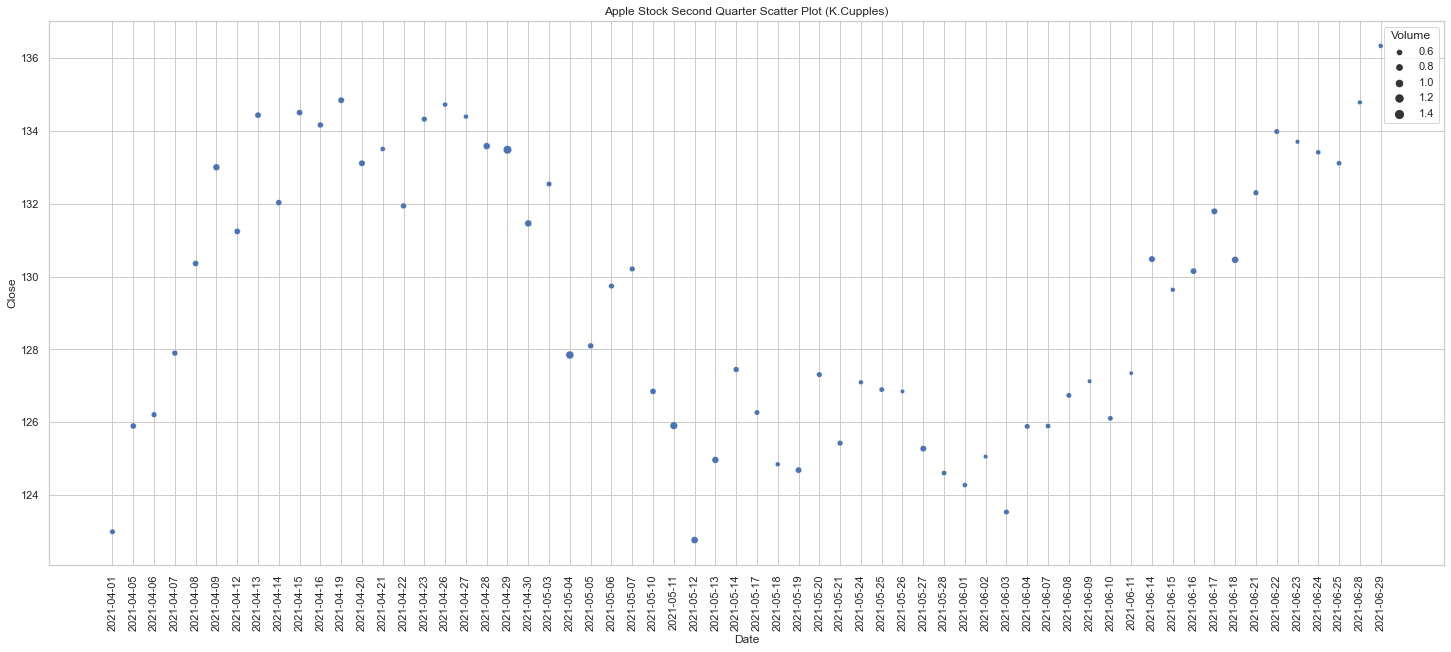

In [13]:
sns.set_style("whitegrid")
fig, AppleScatter = plt.subplots(figsize=(25,10))
plt.xticks(rotation=90)
AppleScatter.set_title("Apple Stock Second Quarter Scatter Plot (K.Cupples)")
scatter = sns.scatterplot(ax=AppleScatter, data=AppleSecondQuarter,
            x="Date", y="Close", size="Volume")

##### Matplotlib Plot

In [14]:
HistogramData = AppleSecondQuarter["Volume"]

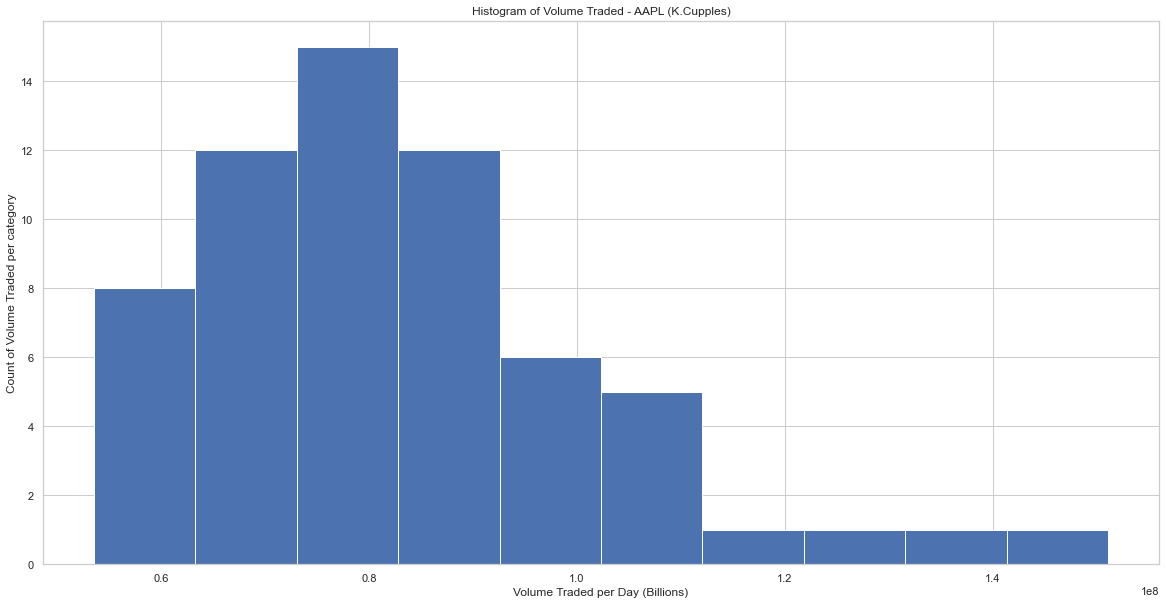

In [15]:
fig, HistVolume = plt.subplots(figsize=(20,10))
HistVolume.hist(HistogramData, )
HistVolume.set_title("Histogram of Volume Traded - AAPL (K.Cupples)")
HistVolume.set_xlabel("Volume Traded per Day (Billions)")
HistVolume.set_ylabel("Count of Volume Traded per category")
plt.show()

In [16]:
Averages = np.array([["April", Apple.iloc[182:203]["Close"].mean(),"May", Apple.iloc[203:223]["Close"].mean(), "June", Apple.iloc[223:245]["Close"].mean()]])
AverageMonthsTable = np.reshape(Averages,(3,2))
Column = [ "Month", "Average"]
AveragePrice = pd.DataFrame(AverageMonthsTable, columns=Column)
AveragePrice

Month             Average
0  April   131.8128579047619
1    May        126.78399995
2   June  129.95863595454546

##### Plotly Plot

In [17]:
fig = px.pie(AveragePrice, values="Average", names="Month", title="Average stock value - AAPL (K.Cupples)")
fig.show()

### Shawn Sonnack
AMC

#### Get Data

In [18]:
amcMergedDataFrame = get_data('AMC')



amcMergedDataFrame

Unnamed: 0       Open       High        Low      Close  Adj Close  \
0   2021-04-01  10.230000  10.260000   9.150000   9.360000   9.360000   
1   2021-04-05  10.100000  11.250000   9.720000  10.610000  10.610000   
2   2021-04-06  10.400000  10.500000  10.000000  10.200000  10.200000   
3   2021-04-07  10.070000  10.180000   9.850000   9.850000   9.850000   
4   2021-04-08  10.010000  10.010000   9.500000   9.790000   9.790000   
..         ...        ...        ...        ...        ...        ...   
57  2021-06-23  57.040001  61.099998  56.799999  58.299999  58.299999   
58  2021-06-24  57.980000  58.759998  55.660000  56.700001  56.700001   
59  2021-06-25  55.750000  56.290001  52.970001  54.060001  54.060001   
60  2021-06-28  55.099998  59.360001  54.330002  58.110001  58.110001   
61  2021-06-29  59.060001  61.000000  56.180000  56.430000  56.430000   

       Volume  Search Interest  isPartial  
0    77473900               14      False  
1    96082300               11      False  
2    44067000               11      False  
3    28804300                9      False  
4    33408700                9      False  
..        ...              ...        ...  
57  116291800               23      False  
58   80351200               24      False  
59   77596900               26      False  
60   99310200               27      False  
61   63604100               24      False  

[62 rows x 9 columns]

In [19]:
# Add a Column Representing Amount Lost or Gained
amcMergedDataFrame["Amount Changed"] = amcMergedDataFrame["Open"] - amcMergedDataFrame["Close"]
amcMergedDataFrame

Unnamed: 0       Open       High        Low      Close  Adj Close  \
0   2021-04-01  10.230000  10.260000   9.150000   9.360000   9.360000   
1   2021-04-05  10.100000  11.250000   9.720000  10.610000  10.610000   
2   2021-04-06  10.400000  10.500000  10.000000  10.200000  10.200000   
3   2021-04-07  10.070000  10.180000   9.850000   9.850000   9.850000   
4   2021-04-08  10.010000  10.010000   9.500000   9.790000   9.790000   
..         ...        ...        ...        ...        ...        ...   
57  2021-06-23  57.040001  61.099998  56.799999  58.299999  58.299999   
58  2021-06-24  57.980000  58.759998  55.660000  56.700001  56.700001   
59  2021-06-25  55.750000  56.290001  52.970001  54.060001  54.060001   
60  2021-06-28  55.099998  59.360001  54.330002  58.110001  58.110001   
61  2021-06-29  59.060001  61.000000  56.180000  56.430000  56.430000   

       Volume  Search Interest  isPartial  Amount Changed  
0    77473900               14      False        0.870000  
1    96082300               11      False       -0.509999  
2    44067000               11      False        0.200000  
3    28804300                9      False        0.219999  
4    33408700                9      False        0.220000  
..        ...              ...        ...             ...  
57  116291800               23      False       -1.259998  
58   80351200               24      False        1.279999  
59   77596900               26      False        1.689999  
60   99310200               27      False       -3.010002  
61   63604100               24      False        2.630001  

[62 rows x 10 columns]

##### MatPlotLib Plot

In [20]:
amcFiltered = amcMergedDataFrame[['Search Interest', 'Close']]

In [21]:
amcFiltered.head()
amcFiltered

Search Interest      Close
0                14   9.360000
1                11  10.610000
2                11  10.200000
3                 9   9.850000
4                 9   9.790000
..              ...        ...
57               23  58.299999
58               24  56.700001
59               26  54.060001
60               27  58.110001
61               24  56.430000

[62 rows x 2 columns]

Create MatPlotLib focused on the price of stock and the level of search interest.  100 being extremely high, 0 being very little.

Text(0.5, 0, 'Price of Stock')

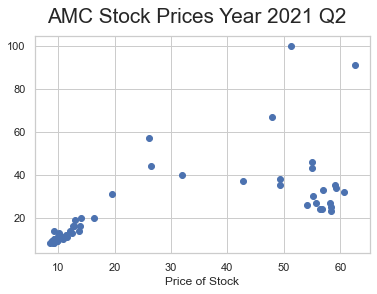

In [22]:
plt.scatter(amcFiltered["Close"].values, amcFiltered["Search Interest"].values,)

plt.suptitle('AMC Stock Prices Year 2021 Q2', ha='center', fontsize='xx-large')
plt.xlabel('Price of Stock')

##### SeaBorne Plot

In [23]:
amcFilteredForSeaborne = amcMergedDataFrame[['Search Interest', 'Amount Changed']]
amcFilteredForSeaborne

Search Interest  Amount Changed
0                14        0.870000
1                11       -0.509999
2                11        0.200000
3                 9        0.219999
4                 9        0.220000
..              ...             ...
57               23       -1.259998
58               24        1.279999
59               26        1.689999
60               27       -3.010002
61               24        2.630001

[62 rows x 2 columns]

Text(0.5, 1.0, 'Amount Changed Based on Search Interest - AMC')

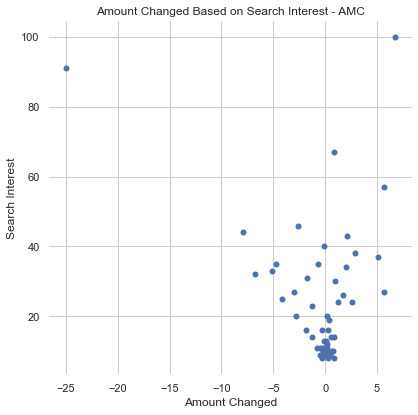

In [24]:
# Create SeaBorne Chart showing Amount changed based on search interest.

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="Amount Changed", y="Search Interest",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=amcFilteredForSeaborne, ax=ax)

ax.set_title("Amount Changed Based on Search Interest - AMC")

#### Plotly Plot

In [25]:
# Prepare the table
amcFilteredPlotLy = amcMergedDataFrame[['Close']]

In [26]:
# Plot the graph
fig = px.line(amcFilteredPlotLy, title='Stock Price During The Period - AMC',
labels={
                     "value": "Price",
                     "index": "Date",
                     "variable": "Closing Price"
                 },)
fig.show()

### Coke
Arielle Swift

#### Get Data

In [27]:
KO2ndQtrData = get_data("KO")

# Name unnamed date column
KO2ndQtrData.rename(columns = {"Unnamed: 0": "Date"},inplace = True)

KO2ndQtrData

Date       Open       High        Low      Close  Adj Close  \
0   2021-04-01  52.959999  53.150002  52.459999  52.509998  52.117294   
1   2021-04-05  52.349998  53.220001  52.290001  52.810001  52.415054   
2   2021-04-06  53.040001  53.650002  52.900002  53.189999  52.792210   
3   2021-04-07  53.279999  53.500000  53.119999  53.279999  52.881535   
4   2021-04-08  53.169998  53.380001  52.970001  53.119999  52.722733   
..         ...        ...        ...        ...        ...        ...   
57  2021-06-23  54.560001  54.599998  54.110001  54.119999  54.119999   
58  2021-06-24  54.259998  54.419998  54.000000  54.389999  54.389999   
59  2021-06-25  54.240002  54.470001  54.009998  54.320000  54.320000   
60  2021-06-28  54.250000  54.369999  54.000000  54.259998  54.259998   
61  2021-06-29  54.130001  54.340000  53.720001  53.860001  53.860001   

      Volume  Search Interest  isPartial  
0   15834700               84      False  
1   16368700               84      False  
2   15614300               79      False  
3   10062700               78      False  
4    9695600               82      False  
..       ...              ...        ...  
57  12339200               82      False  
58  11488400               83      False  
59  18880300               87      False  
60  10556900               83      False  
61  12300900               86      False  

[62 rows x 9 columns]

In [28]:
KO2ndQtrData['Date']= pd.to_datetime(KO2ndQtrData['Date'],format='%Y-%m-%d')
KO2ndQtrData['Date'] = KO2ndQtrData['Date'].dt.strftime('%m-%d-%Y')
KO2ndQtrData


Date       Open       High        Low      Close  Adj Close  \
0   04-01-2021  52.959999  53.150002  52.459999  52.509998  52.117294   
1   04-05-2021  52.349998  53.220001  52.290001  52.810001  52.415054   
2   04-06-2021  53.040001  53.650002  52.900002  53.189999  52.792210   
3   04-07-2021  53.279999  53.500000  53.119999  53.279999  52.881535   
4   04-08-2021  53.169998  53.380001  52.970001  53.119999  52.722733   
..         ...        ...        ...        ...        ...        ...   
57  06-23-2021  54.560001  54.599998  54.110001  54.119999  54.119999   
58  06-24-2021  54.259998  54.419998  54.000000  54.389999  54.389999   
59  06-25-2021  54.240002  54.470001  54.009998  54.320000  54.320000   
60  06-28-2021  54.250000  54.369999  54.000000  54.259998  54.259998   
61  06-29-2021  54.130001  54.340000  53.720001  53.860001  53.860001   

      Volume  Search Interest  isPartial  
0   15834700               84      False  
1   16368700               84      False  
2   15614300               79      False  
3   10062700               78      False  
4    9695600               82      False  
..       ...              ...        ...  
57  12339200               82      False  
58  11488400               83      False  
59  18880300               87      False  
60  10556900               83      False  
61  12300900               86      False  

[62 rows x 9 columns]

In [29]:
KO2ndQtrData = KO2ndQtrData.loc[(KO2ndQtrData['Date'] >= '04-01-2021')
                     & (KO2ndQtrData['Date'] < '07-01-2021')]

#### Matplotlib Graph

In [30]:
#Mean for High, Low, Open, & Close of daily reported stock prices

muHigh=KO2ndQtrData["High"].mean()
muLow=KO2ndQtrData["Low"].mean()
muOpen=KO2ndQtrData["Open"].mean()
muClose=KO2ndQtrData["Close"].mean()


In [31]:
#Standard deviation for High, Low, Open, & Close of daily reported stock prices
stdHigh=np.std(KO2ndQtrData["High"], ddof=1)
stdLow=np.std(KO2ndQtrData["Low"], ddof=1)
stdOpen=np.std(KO2ndQtrData["Open"], ddof=1)
stdClose=np.std(KO2ndQtrData["Close"], ddof=1)

In [32]:
KO2ndQtrData=KO2ndQtrData.assign(Dailyalpha=lambda x: (x.Close+0.42-x.Open) / x.Open)


In [33]:
alphaAvg=KO2ndQtrData["Dailyalpha"].mean()
alphaAvg

0.007270749047387017

Text(0, 0.5, 'Frequency')

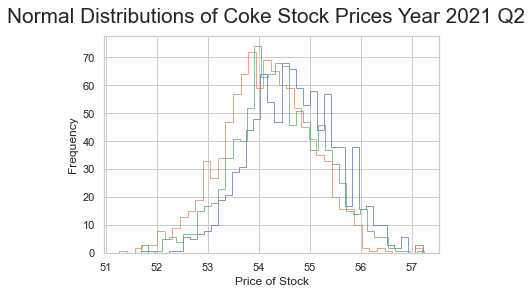

In [34]:
x1=np.random.normal(muHigh,stdHigh,1000)
x2=np.random.normal(muLow,stdLow,1000)
x3=np.random.normal(muOpen,stdOpen,1000)
x4=np.random.normal(muClose,stdClose,1000)

kwargs=dict(histtype='step', alpha=0.7, bins = 40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.suptitle('Normal Distributions of Coke Stock Prices Year 2021 Q2', ha='center', fontsize='xx-large')
plt.xlabel('Price of Stock')
plt.ylabel('Frequency')

#### Seaborn Plot

<Figure size 1800x1800 with 0 Axes>

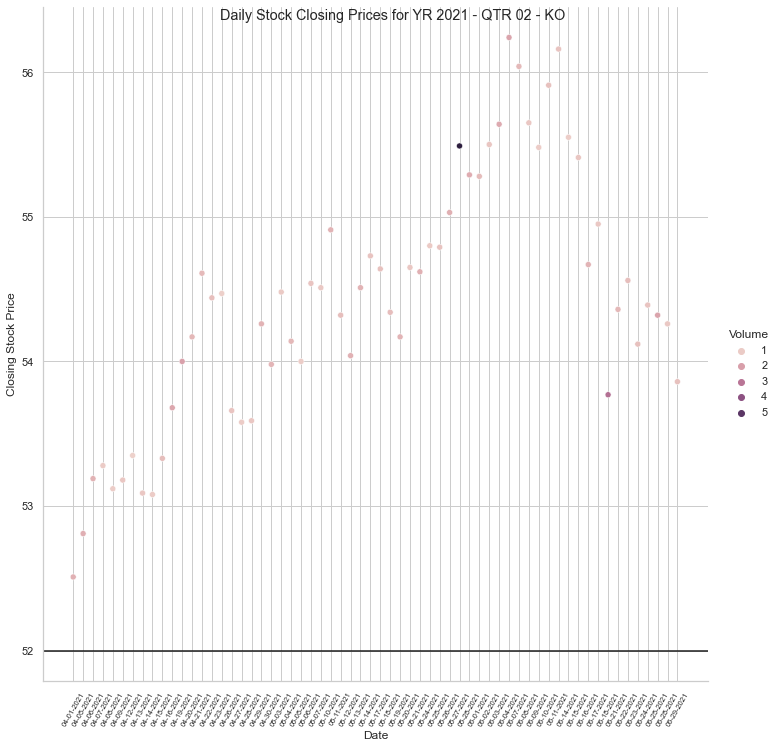

<Figure size 1800x1800 with 0 Axes>

In [35]:
Y21Q2=sns.relplot(data=KO2ndQtrData, x="Date", y="Close",hue="Volume",height=10)
Y21Q2.map(plt.axhline, y=52, color="k")
Y21Q2.set_axis_labels( "Date","Closing Stock Price")
Y21Q2.fig.suptitle("Daily Stock Closing Prices for YR 2021 - QTR 02 - KO")
x_dates = KO2ndQtrData['Date'].sort_values(ascending=True).unique()
Y21Q2.set_xticklabels(labels=x_dates, rotation=60, fontsize=7.5)
plt.figure(figsize = (25,25))


#### Plotly Plot

In [36]:
fig = px.pie(KO2ndQtrData["Volume"], values='Volume', title='Volume Rate per Date YR2021 Q02')
fig.show()

### Tesla (TSLA)
Andrew T.

This notebook shows analysis of Telsa search word using Google Trends over April 1, 2021 to June 30, 2021 as well as the stock preformed during the same period of time.  The end goal is to eventully see if Trends is an indecator of buying or selling the stock the next day.  While this notebook is the start of that analysis is isn't complete at achiving that goal just yet.

Next few lines are about extracting Google Trends data the word Tesla over 04-01-2021 to 06-30-2021 time period as well as the financial information of the Tesla stock.  You are able to see the open and closing price along with the high and lows for the day and the trading volume.

In [37]:
tesladf = get_data("TSLA")

# Name unnamed date column
tesladf.rename(columns = {"Unnamed: 0": "Date"},inplace = True)

# Set date as index
tesladf.set_index('Date', inplace=True)

tesladf

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  688.369995  692.419983  659.419983  661.750000  661.750000   
2021-04-05  707.710022  708.159973  684.700012  691.049988  691.049988   
2021-04-06  690.299988  696.549988  681.369995  691.619995  691.619995   
2021-04-07  687.000000  691.380005  667.840027  670.969971  670.969971   
2021-04-08  677.380005  689.549988  671.650024  683.799988  683.799988   
...                ...         ...         ...         ...         ...   
2021-06-23  632.000000  657.200012  630.039978  656.570007  656.570007   
2021-06-24  674.989990  697.619995  667.609985  679.820007  679.820007   
2021-06-25  689.580017  693.809998  668.700012  671.869995  671.869995   
2021-06-28  671.640015  694.700012  670.320007  688.719971  688.719971   
2021-06-29  684.650024  687.510010  675.890015  680.760010  680.760010   

              Volume  Search Interest  isPartial  
Date                                              
2021-04-01  35298400               69      False  
2021-04-05  41842800               94      False  
2021-04-06  28271800               67      False  
2021-04-07  26309400               59      False  
2021-04-08  23924300               55      False  
...              ...              ...        ...  
2021-06-23  31099200               44      False  
2021-06-24  45982400               65      False  
2021-06-25  32496700               55      False  
2021-06-28  21628200               43      False  
2021-06-29  17381300               40      False  

[62 rows x 8 columns]

The mean Search Interest for Tesla is 67.1 over the time period of 04-01-2021 to 06-30-2021. For a given day the search interest is subracted from the mean and is added to the teslaTrendsdf Data Frame in a new column.

In [38]:
teslaTrendsMean = tesladf['Search Interest'].mean()
#print(f'The mean of the Search Interest for Tesla is {teslaTrendsMean}')
tesladf["Points Away From Mean"] = tesladf["Search Interest"] - teslaTrendsMean
tesladf


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  688.369995  692.419983  659.419983  661.750000  661.750000   
2021-04-05  707.710022  708.159973  684.700012  691.049988  691.049988   
2021-04-06  690.299988  696.549988  681.369995  691.619995  691.619995   
2021-04-07  687.000000  691.380005  667.840027  670.969971  670.969971   
2021-04-08  677.380005  689.549988  671.650024  683.799988  683.799988   
...                ...         ...         ...         ...         ...   
2021-06-23  632.000000  657.200012  630.039978  656.570007  656.570007   
2021-06-24  674.989990  697.619995  667.609985  679.820007  679.820007   
2021-06-25  689.580017  693.809998  668.700012  671.869995  671.869995   
2021-06-28  671.640015  694.700012  670.320007  688.719971  688.719971   
2021-06-29  684.650024  687.510010  675.890015  680.760010  680.760010   

              Volume  Search Interest  isPartial  Points Away From Mean  
Date                                                                     
2021-04-01  35298400               69      False              13.903226  
2021-04-05  41842800               94      False              38.903226  
2021-04-06  28271800               67      False              11.903226  
2021-04-07  26309400               59      False               3.903226  
2021-04-08  23924300               55      False              -0.096774  
...              ...              ...        ...                    ...  
2021-06-23  31099200               44      False             -11.096774  
2021-06-24  45982400               65      False               9.903226  
2021-06-25  32496700               55      False              -0.096774  
2021-06-28  21628200               43      False             -12.096774  
2021-06-29  17381300               40      False             -15.096774  

[62 rows x 9 columns]

#### Graphs
#### Matplotlib Plot
This will demostrate the Telsa Search Interest distribution. This is a metric Google takes by normalizing a score of 100 to the mosted search day within the period.  You will notice this is not a normal distribution.





Text(0, 0.5, 'Number of Occurances')

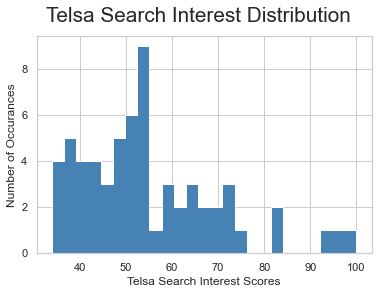

In [39]:
plt.hist(tesladf["Search Interest"], bins=25,  histtype='stepfilled', color='steelblue')
plt.suptitle('Telsa Search Interest Distribution', ha='center', fontsize='xx-large')
plt.xlabel('Telsa Search Interest Scores')
plt.ylabel('Number of Occurances')

#### Seaborn Plot

This will demostrate the close price of Tesla over time

Text(0.5, 1.0, 'Tesla Close Price Over Time')

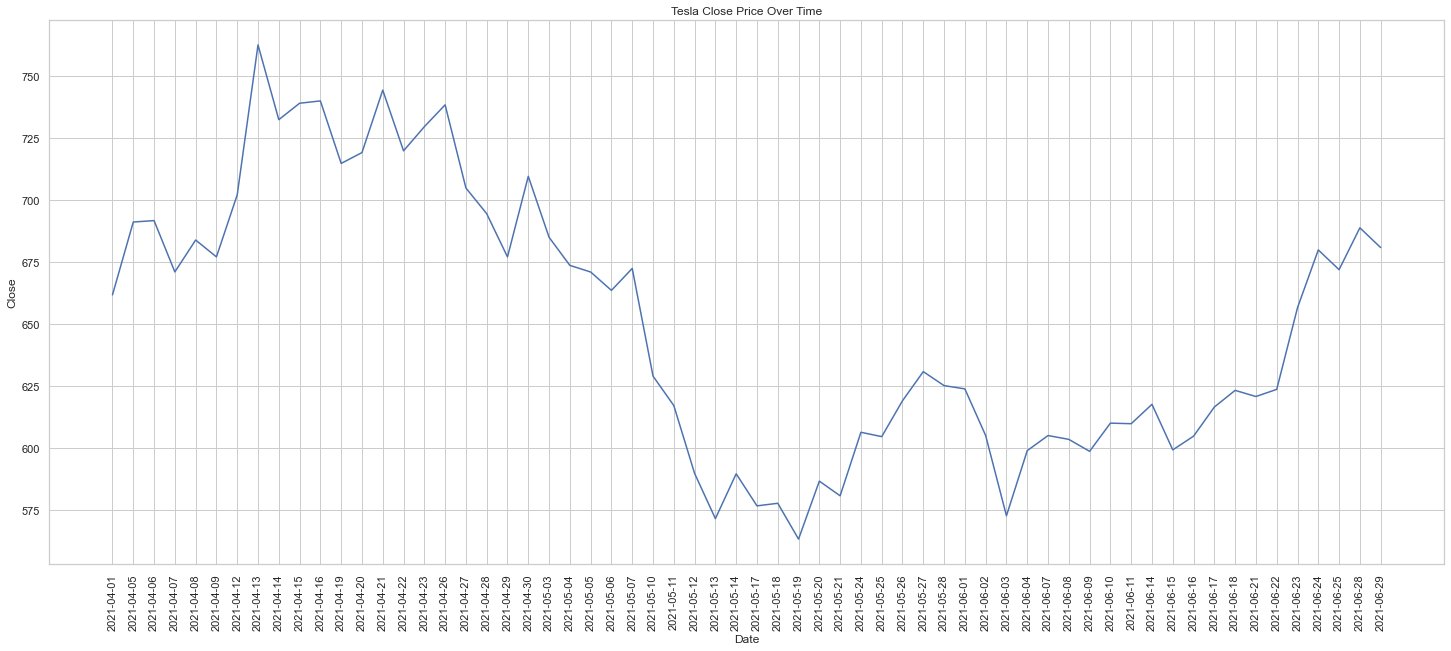

In [40]:
TeslaLine = plt.subplots(figsize=(25,10))
plt.xticks(rotation=90)
sns.set_theme(style="darkgrid")
TeslaLine =sns.lineplot(x="Date", y="Close",
            data=tesladf).set_title("Tesla Close Price Over Time")
TeslaLine


#### Plotly Plot

This shows a scatter plot of close price with the trading volume

In [41]:
plotlyFig = px.scatter(tesladf, x="Close", y="Volume",
                 labels={
                     "Close": "Close Price",
                     "Volume": "Trading Volume"
                 },
                title="Tesla Trading Volume vs Price over Time")
plotlyFig.show()

### John Deere (DE)
Dan Knobloch

#### Data Load:

In [42]:
JDStockTrend = get_data("DE")

# Name unnamed date column
JDStockTrend.rename(columns = {"Unnamed: 0": "Date"},inplace = True)

JDStockTrend

Date        Open        High         Low       Close   Adj Close  \
0   2021-04-01  375.630005  376.000000  369.290009  372.119995  371.162811   
1   2021-04-05  375.600006  377.940002  373.910004  374.809998  373.845886   
2   2021-04-06  375.790009  381.839996  375.019989  375.609985  374.643829   
3   2021-04-07  375.750000  378.880005  372.410004  374.790009  373.825958   
4   2021-04-08  372.290009  374.529999  368.630005  374.070007  373.107819   
..         ...         ...         ...         ...         ...         ...   
57  2021-06-23  342.679993  349.170013  341.489990  347.750000  346.855499   
58  2021-06-24  349.559998  354.739990  346.529999  350.619995  349.718109   
59  2021-06-25  354.089996  355.890015  347.140015  349.989990  349.089722   
60  2021-06-28  350.380005  350.950012  345.100006  349.890015  348.990021   
61  2021-06-29  350.799988  352.700012  348.089996  348.929993  348.929993   

     Volume  Search Interest  isPartial  
0   1561900               85      False  
1   1419500               91      False  
2   1309700               94      False  
3   1299300               94      False  
4   1250700               92      False  
..      ...              ...        ...  
57  3352700               91      False  
58  2140200               92      False  
59  6604800               91      False  
60  1304200               92      False  
61  1213400               96      False  

[62 rows x 9 columns]

#### John Deere Plots Introduction

#### Matplotlib Plot

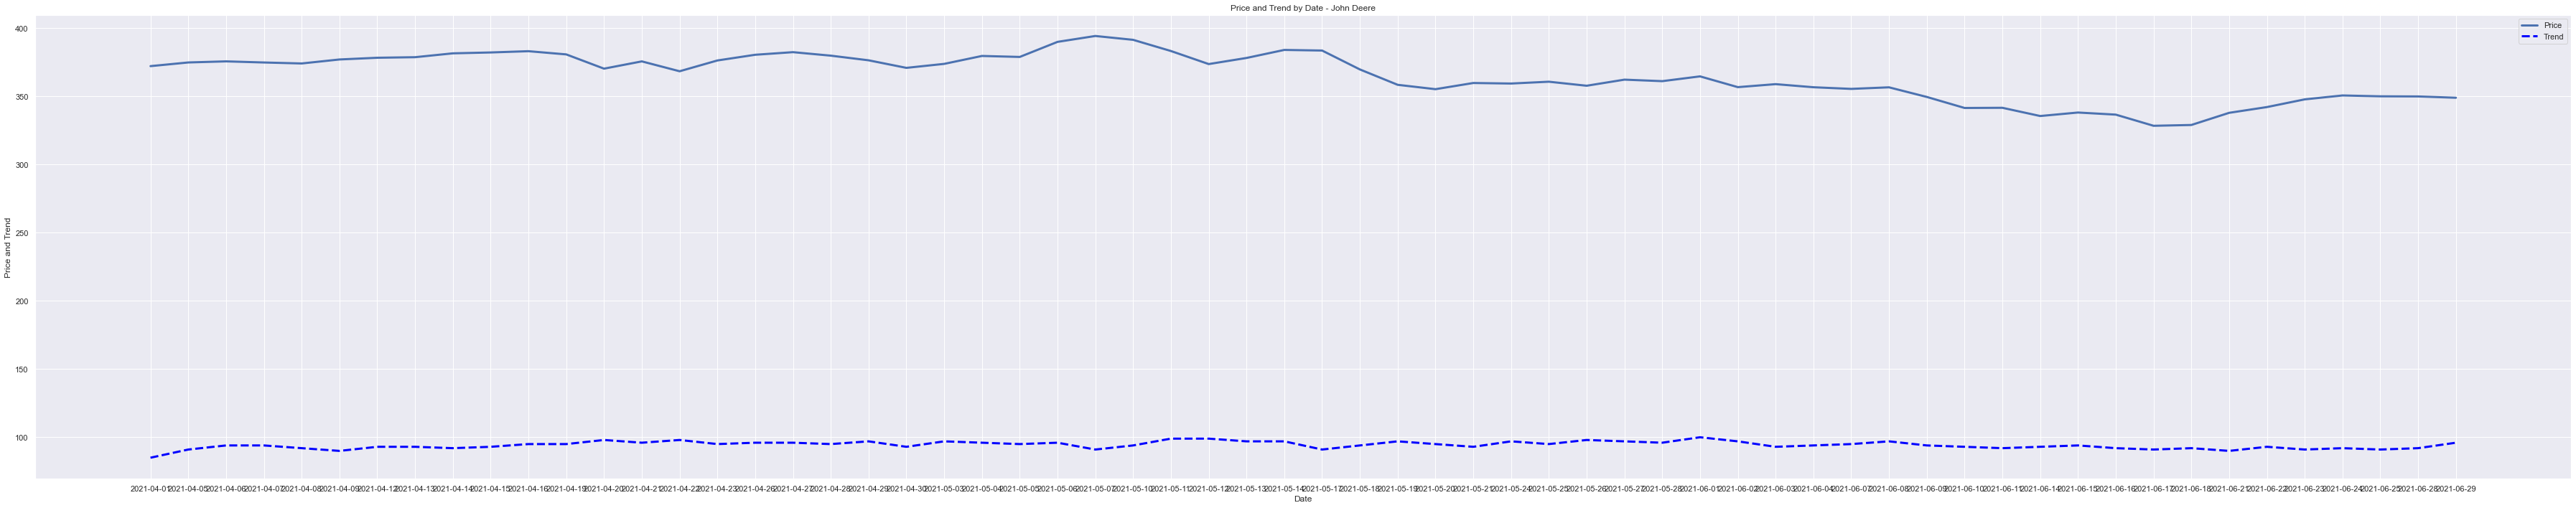

In [43]:
# Knobloch - Matplotlib plot
# a line graph with two lines utilizing the same Y axis, in reference to the date
Date = JDStockTrend['Date']
JDPrice = JDStockTrend['Close']
JDTrend = JDStockTrend['Search Interest']

plt.figure(figsize=(50,10))
plt.plot(Date, JDPrice , label='Price' , linewidth=3)
plt.plot(Date, JDTrend, label='Trend', linestyle='dashed', color='blue' , linewidth=3)
plt.xlabel('Date')
plt.ylabel('Price and Trend')
plt.title('Price and Trend by Date - John Deere')
plt.legend()
plt.tight_layout()
plt.show()

Analysis - the graph shows the price and trend data in reference to the date. it does not seem to show correlation between price and trend data over time as we had hoped. perhaps a more volitile stock would experience a better releation between the data points.

#### Seaborn Plot

Text(0.5, 0.98, 'Highest Price Over Various Trend Number - John Deere')

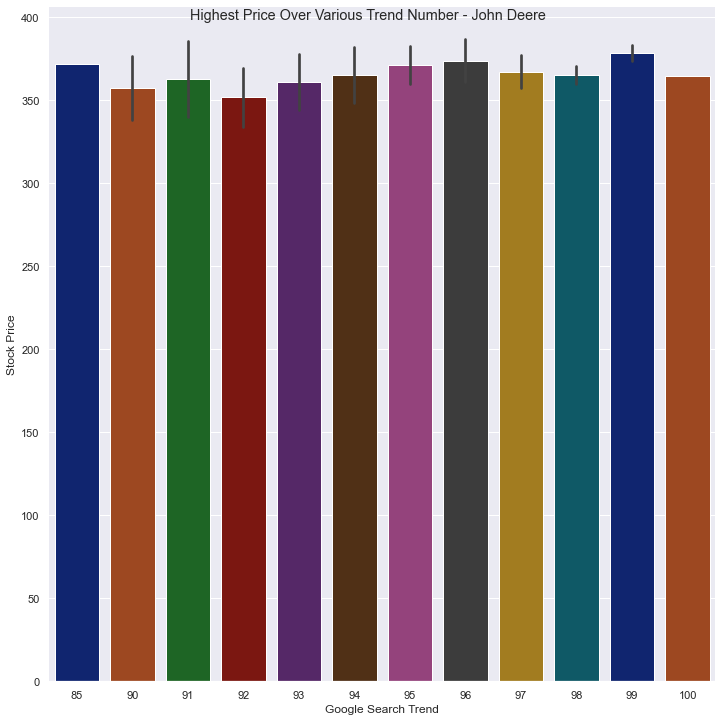

In [44]:
# Knobloch - Seaborn plot
# a bar style cat plot to show the highest price of the share over all the various trend numbers
sPlot = sns.catplot(
    data=JDStockTrend, kind="bar",
    x="Search Interest", y="Close",
    ci="sd", palette="dark", alpha=1, height=10)


sPlot.despine(left=True)
sPlot.set_axis_labels("Google Search Trend", "Stock Price")
sPlot.fig.suptitle("Highest Price Over Various Trend Number - John Deere")


Analysis - the graph shows the highest price per share at any given trend ranking. it does seem to show correlation between price and trend data.

### Part 3: Plotly

In [45]:
# Knobloch - Plotly plot
# a scatter plot with price by trend.

fig = px.scatter(JDStockTrend,x="Search Interest", y = "Close", title="Price of Stock vs. Search Interest - DE")
fig.show()



Analysis - the graph shows the price per share at each given trend ranking
